# Analysis and Visualization

This notebook covers exploratory data analysis, correlation analysis, time series analysis, and advanced visualizations including multi-plot dashboards and interactive plots.

Cleaned data loaded successfully
Summary statistics:
             Row ID  Postal Code         Sales      Quantity      Discount  \
count  28949.000000      28949.0  28949.000000  28949.000000  28949.000000   
mean   21948.486614      56430.5    100.203369      3.025389      0.090520   
std    15054.223873          0.0    100.224363      1.866765      0.157232   
min        1.000000      56430.5      1.956000      1.000000      0.000000   
25%     9299.000000      56430.5     30.240000      2.000000      0.000000   
50%    19556.000000      56430.5     62.700000      3.000000      0.000000   
75%    29785.000000      56430.5    135.744000      4.000000      0.100000   
max    51290.000000      56430.5    581.250000      9.000000      0.500000   

             Profit  Shipping Cost  
count  28949.000000   28949.000000  
mean      14.289823       9.909052  
std       24.147503      10.716634  
min      -55.125000       0.000000  
25%        1.540000       2.520000  
50%        8.856000   

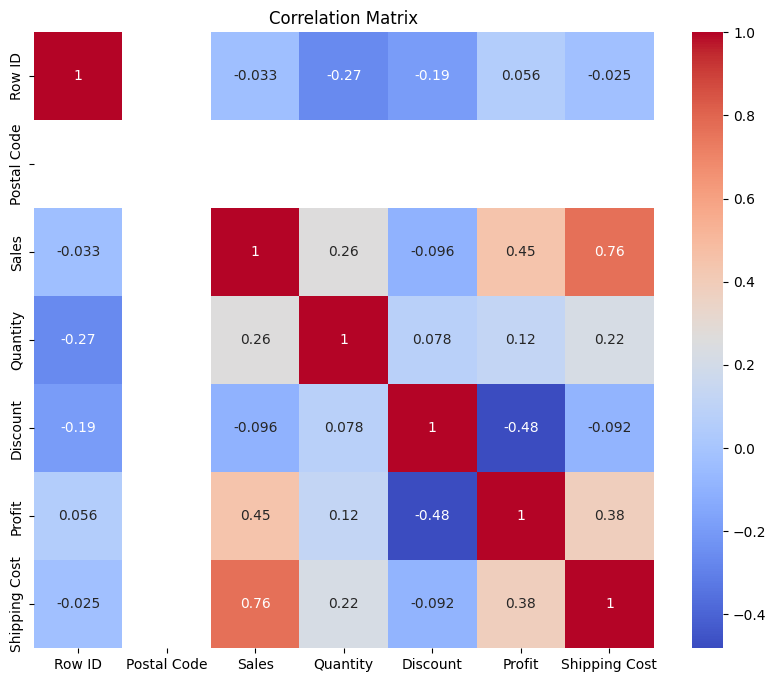

C:\Users\onlyw\AppData\Local\Temp\ipykernel_15068\1615353563.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data['Sales'].resample('M').sum()


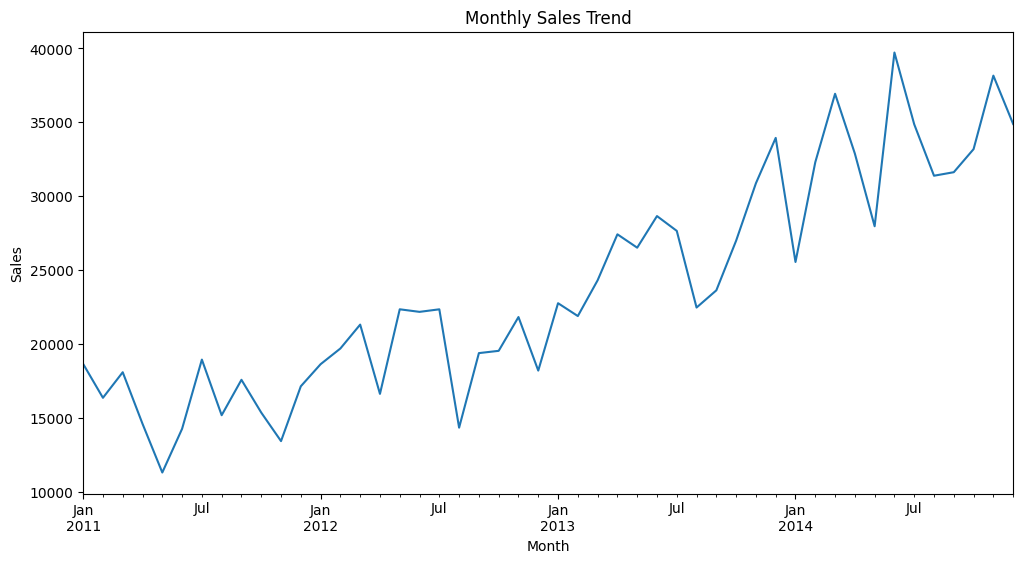

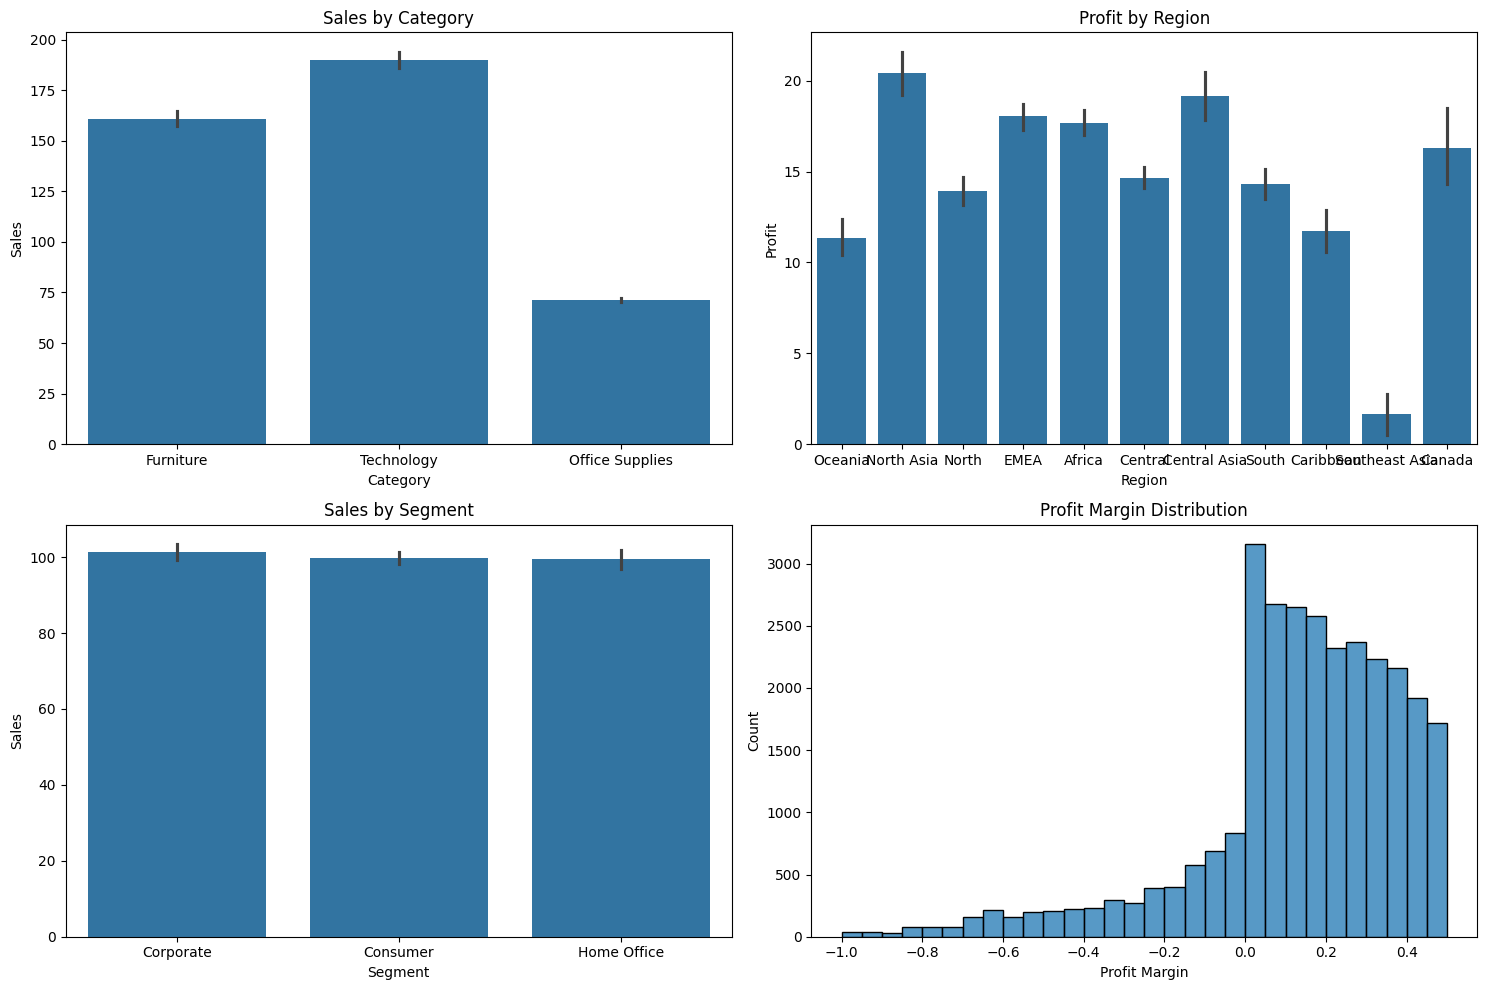

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load cleaned data
try:
    sales_data = pd.read_csv('../data/processed/sales_data_cleaned.csv')  # Adjust path and filename as needed
    print('Cleaned data loaded successfully')
except Exception as e:
    print(f'Error loading cleaned data: {e}')

# Exploratory Data Analysis
print('Summary statistics:')
print(sales_data.describe())

# Correlation matrix for numeric columns only
numeric_data = sales_data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Time series analysis of sales trends
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')
sales_data.set_index('Order Date', inplace=True)
monthly_sales = sales_data['Sales'].resample('M').sum()
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Advanced Visualizations - Multi-plot dashboard example
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Sales by Category
sns.barplot(x='Category', y='Sales', data=sales_data, ax=axs[0,0])
axs[0,0].set_title('Sales by Category')

# Profit by Region
sns.barplot(x='Region', y='Profit', data=sales_data, ax=axs[0,1])
axs[0,1].set_title('Profit by Region')

# Sales by Segment
sns.barplot(x='Segment', y='Sales', data=sales_data, ax=axs[1,0])
axs[1,0].set_title('Sales by Segment')

# Profit Margin Distribution (assuming Profit Margin is calculated)
if 'Profit Margin' in sales_data.columns:
    sns.histplot(sales_data['Profit Margin'], bins=30, ax=axs[1,1])
    axs[1,1].set_title('Profit Margin Distribution')
else:
    # Calculate Profit Margin if not present
    sales_data['Profit Margin'] = sales_data['Profit'] / sales_data['Sales']
    sns.histplot(sales_data['Profit Margin'], bins=30, ax=axs[1,1])
    axs[1,1].set_title('Profit Margin Distribution')

plt.tight_layout()
plt.show()
